In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
import random
from sklearn import metrics

In [2]:
def ts_idlist(df,idlist,window):
    X=[]
    y=[]
    feature_cols=df.columns.to_list()
    feature_cols.remove('ID')
    feature_cols.remove('RUL')
    for i in idlist:
            df_ID = df[df['ID']==i]
            df_ID = df_ID.drop(columns=['ID'])
            features = df_ID[feature_cols].to_numpy()
            target = df_ID[['RUL']].to_numpy()
            ts_generator = TimeseriesGenerator(features,target,length=window,sampling_rate=1,batch_size=1)
            for j in range(len(ts_generator)):
                x_temp, y_temp = ts_generator[j]
                X.append(x_temp[0])
                y.append(y_temp[0][0])
    X=np.array(X)
    y=np.array(y)
    return(X,y)

In [3]:
def get_ts(dataset_n,window):
    df=pd.read_csv("Train_{}.csv".format(dataset_n))
    ID=np.unique(df['ID'])
    n=5
    k, m = divmod(len(ID), n)
    chunks=[ID[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n)]
    ID_validation=chunks[-1].tolist()
    ID_train=[i for i in ID if i not in ID_validation]
    X_validation,y_validation=ts_idlist(df,ID_validation,window)
    X_train,y_train=ts_idlist(df,ID_train,window)
    df=pd.read_csv("Test_{}.csv".format(dataset_n))
    ID_test=np.unique(df['ID']).tolist()
    X_test,y_test=ts_idlist(df,ID_test,window)
    return(X_train,y_train,X_validation,y_validation,X_test,y_test)

In [4]:
window=5,
dataset_n=1
X_train,y_train,X_validation,y_validation,X_test,y_test=get_ts(1,5)

In [5]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape

((15738, 5, 13), (15738,), (4393, 5, 13), (4393,), (12596, 5, 13), (12596,))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(5, 13)))
model.add(Dropout(0.2))
model.add(LSTM(
          units=100,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))
model.add(Activation("relu"))
model.compile(loss="mse", optimizer="rmsprop", metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 100)            45600     
                                                                 
 dropout (Dropout)           (None, 5, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 126,101
Trainable params: 126,101
Non-trai

In [7]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [8]:
history=model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=100, callbacks=[cp])

Epoch 1/100
491/492 [============================>.] - ETA: 0s - loss: 12398.2139 - root_mean_squared_error: 111.3473

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 22s 37ms/step - loss: 12394.6699 - root_mean_squared_error: 111.3314 - val_loss: 15756.1572 - val_root_mean_squared_error: 125.5235
Epoch 2/100
490/492 [============================>.] - ETA: 0s - loss: 10904.0107 - root_mean_squared_error: 104.4223

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 35ms/step - loss: 10902.6445 - root_mean_squared_error: 104.4157 - val_loss: 14732.0137 - val_root_mean_squared_error: 121.3755
Epoch 3/100
491/492 [============================>.] - ETA: 0s - loss: 10106.0371 - root_mean_squared_error: 100.5288

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 10102.5850 - root_mean_squared_error: 100.5116 - val_loss: 13843.3018 - val_root_mean_squared_error: 117.6576
Epoch 4/100
492/492 [==============================] - ETA: 0s - loss: 9398.4160 - root_mean_squared_error: 96.9454

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 35ms/step - loss: 9398.4160 - root_mean_squared_error: 96.9454 - val_loss: 13035.2988 - val_root_mean_squared_error: 114.1722
Epoch 5/100
489/492 [============================>.] - ETA: 0s - loss: 8763.4160 - root_mean_squared_error: 93.6131

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 33ms/step - loss: 8762.6943 - root_mean_squared_error: 93.6093 - val_loss: 12291.1826 - val_root_mean_squared_error: 110.8656
Epoch 6/100
492/492 [==============================] - ETA: 0s - loss: 8182.4092 - root_mean_squared_error: 90.4567

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 35ms/step - loss: 8182.4092 - root_mean_squared_error: 90.4567 - val_loss: 11603.7041 - val_root_mean_squared_error: 107.7205
Epoch 7/100
488/492 [============================>.] - ETA: 0s - loss: 7646.5835 - root_mean_squared_error: 87.4447

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 34ms/step - loss: 7651.5864 - root_mean_squared_error: 87.4734 - val_loss: 10967.7852 - val_root_mean_squared_error: 104.7272
Epoch 8/100
490/492 [============================>.] - ETA: 0s - loss: 7173.5894 - root_mean_squared_error: 84.6970

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 34ms/step - loss: 7168.3525 - root_mean_squared_error: 84.6661 - val_loss: 10378.2734 - val_root_mean_squared_error: 101.8738
Epoch 9/100
491/492 [============================>.] - ETA: 0s - loss: 6732.4834 - root_mean_squared_error: 82.0517

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 33ms/step - loss: 6732.5176 - root_mean_squared_error: 82.0519 - val_loss: 9835.4238 - val_root_mean_squared_error: 99.1737
Epoch 10/100
492/492 [==============================] - ETA: 0s - loss: 6330.4697 - root_mean_squared_error: 79.5642

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 35ms/step - loss: 6330.4697 - root_mean_squared_error: 79.5642 - val_loss: 9337.8936 - val_root_mean_squared_error: 96.6328
Epoch 11/100
492/492 [==============================] - ETA: 0s - loss: 5983.9419 - root_mean_squared_error: 77.3559

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 34ms/step - loss: 5983.9419 - root_mean_squared_error: 77.3559 - val_loss: 8882.5859 - val_root_mean_squared_error: 94.2475
Epoch 12/100
491/492 [============================>.] - ETA: 0s - loss: 5664.7256 - root_mean_squared_error: 75.2644

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 5662.1216 - root_mean_squared_error: 75.2471 - val_loss: 8466.2070 - val_root_mean_squared_error: 92.0120
Epoch 13/100
489/492 [============================>.] - ETA: 0s - loss: 5373.7295 - root_mean_squared_error: 73.3057

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 5374.8208 - root_mean_squared_error: 73.3132 - val_loss: 8090.2124 - val_root_mean_squared_error: 89.9456
Epoch 14/100
489/492 [============================>.] - ETA: 0s - loss: 5142.8940 - root_mean_squared_error: 71.7140

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 30ms/step - loss: 5138.3882 - root_mean_squared_error: 71.6825 - val_loss: 7754.0425 - val_root_mean_squared_error: 88.0570
Epoch 15/100
490/492 [============================>.] - ETA: 0s - loss: 4929.4414 - root_mean_squared_error: 70.2100

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 31ms/step - loss: 4931.5962 - root_mean_squared_error: 70.2253 - val_loss: 7455.4854 - val_root_mean_squared_error: 86.3452
Epoch 16/100
490/492 [============================>.] - ETA: 0s - loss: 4760.6519 - root_mean_squared_error: 68.9975

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 14s 28ms/step - loss: 4760.1064 - root_mean_squared_error: 68.9935 - val_loss: 7192.9497 - val_root_mean_squared_error: 84.8113
Epoch 17/100
492/492 [==============================] - ETA: 0s - loss: 4528.4453 - root_mean_squared_error: 67.2937

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 31ms/step - loss: 4528.4453 - root_mean_squared_error: 67.2937 - val_loss: 6844.7456 - val_root_mean_squared_error: 82.7330
Epoch 18/100
489/492 [============================>.] - ETA: 0s - loss: 3896.8513 - root_mean_squared_error: 62.4248

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 14s 29ms/step - loss: 3896.7937 - root_mean_squared_error: 62.4243 - val_loss: 6440.7251 - val_root_mean_squared_error: 80.2541
Epoch 19/100
489/492 [============================>.] - ETA: 0s - loss: 3625.8655 - root_mean_squared_error: 60.2152

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 14s 28ms/step - loss: 3621.4363 - root_mean_squared_error: 60.1784 - val_loss: 6355.6772 - val_root_mean_squared_error: 79.7225
Epoch 20/100
491/492 [============================>.] - ETA: 0s - loss: 3388.4529 - root_mean_squared_error: 58.2104

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 3388.1533 - root_mean_squared_error: 58.2078 - val_loss: 5923.5737 - val_root_mean_squared_error: 76.9648
Epoch 21/100
491/492 [============================>.] - ETA: 0s - loss: 3199.0737 - root_mean_squared_error: 56.5604

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 18s 37ms/step - loss: 3196.6326 - root_mean_squared_error: 56.5388 - val_loss: 5518.5146 - val_root_mean_squared_error: 74.2867
Epoch 22/100
492/492 [==============================] - 10s 21ms/step - loss: 3001.6755 - root_mean_squared_error: 54.7875 - val_loss: 5533.5454 - val_root_mean_squared_error: 74.3878
Epoch 23/100
491/492 [============================>.] - ETA: 0s - loss: 2839.5234 - root_mean_squared_error: 53.2872

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 18s 36ms/step - loss: 2843.2031 - root_mean_squared_error: 53.3217 - val_loss: 5037.0767 - val_root_mean_squared_error: 70.9724
Epoch 24/100
492/492 [==============================] - 10s 21ms/step - loss: 2683.5405 - root_mean_squared_error: 51.8029 - val_loss: 5093.5771 - val_root_mean_squared_error: 71.3693
Epoch 25/100
490/492 [============================>.] - ETA: 0s - loss: 2585.5469 - root_mean_squared_error: 50.8483

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 34ms/step - loss: 2584.5928 - root_mean_squared_error: 50.8389 - val_loss: 4804.1895 - val_root_mean_squared_error: 69.3123
Epoch 26/100
492/492 [==============================] - ETA: 0s - loss: 2454.3069 - root_mean_squared_error: 49.5410

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 35ms/step - loss: 2454.3069 - root_mean_squared_error: 49.5410 - val_loss: 4541.8315 - val_root_mean_squared_error: 67.3931
Epoch 27/100
492/492 [==============================] - ETA: 0s - loss: 2375.0054 - root_mean_squared_error: 48.7340

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 17s 34ms/step - loss: 2375.0054 - root_mean_squared_error: 48.7340 - val_loss: 4539.1084 - val_root_mean_squared_error: 67.3729
Epoch 28/100
491/492 [============================>.] - ETA: 0s - loss: 2275.2971 - root_mean_squared_error: 47.7001

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 18s 36ms/step - loss: 2274.3330 - root_mean_squared_error: 47.6900 - val_loss: 4349.8027 - val_root_mean_squared_error: 65.9530
Epoch 29/100
492/492 [==============================] - ETA: 0s - loss: 2197.1006 - root_mean_squared_error: 46.8732

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 18s 37ms/step - loss: 2197.1006 - root_mean_squared_error: 46.8732 - val_loss: 4204.9800 - val_root_mean_squared_error: 64.8458
Epoch 30/100
492/492 [==============================] - ETA: 0s - loss: 2125.2419 - root_mean_squared_error: 46.1003

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 18s 37ms/step - loss: 2125.2419 - root_mean_squared_error: 46.1003 - val_loss: 4139.3320 - val_root_mean_squared_error: 64.3376
Epoch 31/100
492/492 [==============================] - 8s 16ms/step - loss: 2056.0454 - root_mean_squared_error: 45.3436 - val_loss: 4285.8198 - val_root_mean_squared_error: 65.4662
Epoch 32/100
491/492 [============================>.] - ETA: 0s - loss: 2001.2676 - root_mean_squared_error: 44.7355

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 30ms/step - loss: 2002.0370 - root_mean_squared_error: 44.7441 - val_loss: 3914.0132 - val_root_mean_squared_error: 62.5621
Epoch 33/100
492/492 [==============================] - 7s 14ms/step - loss: 1979.7319 - root_mean_squared_error: 44.4942 - val_loss: 3943.8884 - val_root_mean_squared_error: 62.8004
Epoch 34/100
492/492 [==============================] - 7s 14ms/step - loss: 1913.6729 - root_mean_squared_error: 43.7455 - val_loss: 3973.6704 - val_root_mean_squared_error: 63.0371
Epoch 35/100
491/492 [============================>.] - ETA: 0s - loss: 1882.7113 - root_mean_squared_error: 43.3902

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 1882.8250 - root_mean_squared_error: 43.3915 - val_loss: 3804.5085 - val_root_mean_squared_error: 61.6807
Epoch 36/100
492/492 [==============================] - 7s 15ms/step - loss: 1848.0920 - root_mean_squared_error: 42.9894 - val_loss: 3934.2727 - val_root_mean_squared_error: 62.7238
Epoch 37/100
492/492 [==============================] - 7s 14ms/step - loss: 1824.4736 - root_mean_squared_error: 42.7139 - val_loss: 3851.1399 - val_root_mean_squared_error: 62.0576
Epoch 38/100
492/492 [==============================] - 7s 15ms/step - loss: 1792.2500 - root_mean_squared_error: 42.3350 - val_loss: 3834.7375 - val_root_mean_squared_error: 61.9253
Epoch 39/100
489/492 [============================>.] - ETA: 0s - loss: 1772.0560 - root_mean_squared_error: 42.0958

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 14s 28ms/step - loss: 1772.6722 - root_mean_squared_error: 42.1031 - val_loss: 3585.0181 - val_root_mean_squared_error: 59.8750
Epoch 40/100
491/492 [============================>.] - ETA: 0s - loss: 1766.3489 - root_mean_squared_error: 42.0280

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 14s 29ms/step - loss: 1765.0322 - root_mean_squared_error: 42.0123 - val_loss: 3527.9102 - val_root_mean_squared_error: 59.3962
Epoch 41/100
492/492 [==============================] - 8s 15ms/step - loss: 1759.0288 - root_mean_squared_error: 41.9408 - val_loss: 3594.4395 - val_root_mean_squared_error: 59.9536
Epoch 42/100
492/492 [==============================] - 7s 15ms/step - loss: 1738.3920 - root_mean_squared_error: 41.6940 - val_loss: 3677.6262 - val_root_mean_squared_error: 60.6434
Epoch 43/100
492/492 [==============================] - 8s 16ms/step - loss: 1731.4878 - root_mean_squared_error: 41.6111 - val_loss: 3816.3894 - val_root_mean_squared_error: 61.7769
Epoch 44/100
491/492 [============================>.] - ETA: 0s - loss: 1710.0825 - root_mean_squared_error: 41.3531

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 1710.5603 - root_mean_squared_error: 41.3589 - val_loss: 3452.7559 - val_root_mean_squared_error: 58.7602
Epoch 45/100
492/492 [==============================] - 8s 16ms/step - loss: 1714.2235 - root_mean_squared_error: 41.4032 - val_loss: 3510.2688 - val_root_mean_squared_error: 59.2475
Epoch 46/100
491/492 [============================>.] - ETA: 0s - loss: 1692.4823 - root_mean_squared_error: 41.1398

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 30ms/step - loss: 1692.1448 - root_mean_squared_error: 41.1357 - val_loss: 3410.3406 - val_root_mean_squared_error: 58.3981
Epoch 47/100
492/492 [==============================] - 8s 16ms/step - loss: 1678.0552 - root_mean_squared_error: 40.9641 - val_loss: 3430.3499 - val_root_mean_squared_error: 58.5692
Epoch 48/100
492/492 [==============================] - 8s 16ms/step - loss: 1687.7368 - root_mean_squared_error: 41.0821 - val_loss: 3882.6792 - val_root_mean_squared_error: 62.3111
Epoch 49/100
492/492 [==============================] - 8s 16ms/step - loss: 1696.1029 - root_mean_squared_error: 41.1838 - val_loss: 3489.8555 - val_root_mean_squared_error: 59.0750
Epoch 50/100
490/492 [============================>.] - ETA: 0s - loss: 1672.2008 - root_mean_squared_error: 40.8926

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 1673.1075 - root_mean_squared_error: 40.9036 - val_loss: 3369.9209 - val_root_mean_squared_error: 58.0510
Epoch 51/100
492/492 [==============================] - 8s 16ms/step - loss: 1677.1703 - root_mean_squared_error: 40.9533 - val_loss: 3392.2085 - val_root_mean_squared_error: 58.2427
Epoch 52/100
492/492 [==============================] - 8s 16ms/step - loss: 1678.5431 - root_mean_squared_error: 40.9700 - val_loss: 3561.3608 - val_root_mean_squared_error: 59.6771
Epoch 53/100
492/492 [==============================] - 8s 16ms/step - loss: 1683.2761 - root_mean_squared_error: 41.0277 - val_loss: 3591.9375 - val_root_mean_squared_error: 59.9328
Epoch 54/100
492/492 [==============================] - 8s 15ms/step - loss: 1656.4146 - root_mean_squared_error: 40.6991 - val_loss: 3532.7117 - val_root_mean_squared_error: 59.4366
Epoch 55/100
489/492 [============================>.] - ETA: 0s - loss: 1669.2893 - root_mean_squ

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 31ms/step - loss: 1670.0509 - root_mean_squared_error: 40.8663 - val_loss: 3358.0083 - val_root_mean_squared_error: 57.9483
Epoch 56/100
492/492 [==============================] - ETA: 0s - loss: 1643.9650 - root_mean_squared_error: 40.5458

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 1643.9650 - root_mean_squared_error: 40.5458 - val_loss: 3335.3074 - val_root_mean_squared_error: 57.7521
Epoch 57/100
492/492 [==============================] - 8s 15ms/step - loss: 1659.1995 - root_mean_squared_error: 40.7333 - val_loss: 3367.8972 - val_root_mean_squared_error: 58.0336
Epoch 58/100
492/492 [==============================] - 8s 15ms/step - loss: 1645.6248 - root_mean_squared_error: 40.5663 - val_loss: 3437.8884 - val_root_mean_squared_error: 58.6335
Epoch 59/100
492/492 [==============================] - ETA: 0s - loss: 1634.8239 - root_mean_squared_error: 40.4330

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 14s 29ms/step - loss: 1634.8239 - root_mean_squared_error: 40.4330 - val_loss: 3323.3975 - val_root_mean_squared_error: 57.6489
Epoch 60/100
490/492 [============================>.] - ETA: 0s - loss: 1642.6626 - root_mean_squared_error: 40.5298

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 14s 29ms/step - loss: 1645.1582 - root_mean_squared_error: 40.5606 - val_loss: 3318.3372 - val_root_mean_squared_error: 57.6050
Epoch 61/100
492/492 [==============================] - 8s 16ms/step - loss: 1634.4785 - root_mean_squared_error: 40.4287 - val_loss: 3380.8762 - val_root_mean_squared_error: 58.1453
Epoch 62/100
492/492 [==============================] - 8s 16ms/step - loss: 1649.7177 - root_mean_squared_error: 40.6167 - val_loss: 3594.0278 - val_root_mean_squared_error: 59.9502
Epoch 63/100
492/492 [==============================] - 8s 16ms/step - loss: 1630.7172 - root_mean_squared_error: 40.3821 - val_loss: 3597.9834 - val_root_mean_squared_error: 59.9832
Epoch 64/100
492/492 [==============================] - 8s 17ms/step - loss: 1632.1614 - root_mean_squared_error: 40.4000 - val_loss: 3352.3789 - val_root_mean_squared_error: 57.8997
Epoch 65/100
490/492 [============================>.] - ETA: 0s - loss: 1635.9143 - root_mean_squ

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 1635.7614 - root_mean_squared_error: 40.4445 - val_loss: 3265.4167 - val_root_mean_squared_error: 57.1438
Epoch 66/100
492/492 [==============================] - 8s 16ms/step - loss: 1626.8951 - root_mean_squared_error: 40.3348 - val_loss: 3542.1624 - val_root_mean_squared_error: 59.5161
Epoch 67/100
492/492 [==============================] - 8s 16ms/step - loss: 1617.3197 - root_mean_squared_error: 40.2159 - val_loss: 3604.0906 - val_root_mean_squared_error: 60.0341
Epoch 68/100
492/492 [==============================] - ETA: 0s - loss: 1601.7689 - root_mean_squared_error: 40.0221

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 1601.7689 - root_mean_squared_error: 40.0221 - val_loss: 3190.9309 - val_root_mean_squared_error: 56.4883
Epoch 69/100
492/492 [==============================] - ETA: 0s - loss: 1627.2007 - root_mean_squared_error: 40.3386

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 31ms/step - loss: 1627.2007 - root_mean_squared_error: 40.3386 - val_loss: 3172.3459 - val_root_mean_squared_error: 56.3236
Epoch 70/100
492/492 [==============================] - 8s 17ms/step - loss: 1605.0057 - root_mean_squared_error: 40.0625 - val_loss: 3310.0161 - val_root_mean_squared_error: 57.5327
Epoch 71/100
490/492 [============================>.] - ETA: 0s - loss: 1605.6765 - root_mean_squared_error: 40.0709

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 18s 37ms/step - loss: 1605.6768 - root_mean_squared_error: 40.0709 - val_loss: 3168.6555 - val_root_mean_squared_error: 56.2908
Epoch 72/100
492/492 [==============================] - 8s 17ms/step - loss: 1593.7207 - root_mean_squared_error: 39.9214 - val_loss: 3728.6113 - val_root_mean_squared_error: 61.0624
Epoch 73/100
492/492 [==============================] - 9s 19ms/step - loss: 1603.9467 - root_mean_squared_error: 40.0493 - val_loss: 3286.5273 - val_root_mean_squared_error: 57.3282
Epoch 74/100
492/492 [==============================] - 9s 18ms/step - loss: 1617.7542 - root_mean_squared_error: 40.2213 - val_loss: 3532.3333 - val_root_mean_squared_error: 59.4334
Epoch 75/100
492/492 [==============================] - 9s 17ms/step - loss: 1583.8193 - root_mean_squared_error: 39.7972 - val_loss: 3419.7380 - val_root_mean_squared_error: 58.4785
Epoch 76/100
492/492 [==============================] - 9s 17ms/step - loss: 1608.5046 - root_mea

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 33ms/step - loss: 1600.8801 - root_mean_squared_error: 40.0110 - val_loss: 3075.2275 - val_root_mean_squared_error: 55.4547
Epoch 79/100
492/492 [==============================] - 8s 17ms/step - loss: 1583.6096 - root_mean_squared_error: 39.7946 - val_loss: 3453.9397 - val_root_mean_squared_error: 58.7702
Epoch 80/100
492/492 [==============================] - 8s 17ms/step - loss: 1578.7428 - root_mean_squared_error: 39.7334 - val_loss: 3408.8381 - val_root_mean_squared_error: 58.3853
Epoch 81/100
492/492 [==============================] - 8s 17ms/step - loss: 1579.3873 - root_mean_squared_error: 39.7415 - val_loss: 3684.4143 - val_root_mean_squared_error: 60.6994
Epoch 82/100
492/492 [==============================] - 8s 17ms/step - loss: 1562.4933 - root_mean_squared_error: 39.5284 - val_loss: 3490.0979 - val_root_mean_squared_error: 59.0770
Epoch 83/100
492/492 [==============================] - 8s 17ms/step - loss: 1562.8330 - root_mea

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 33ms/step - loss: 1533.4611 - root_mean_squared_error: 39.1594 - val_loss: 3052.2998 - val_root_mean_squared_error: 55.2476
Epoch 88/100
492/492 [==============================] - ETA: 0s - loss: 1540.0410 - root_mean_squared_error: 39.2434

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 16s 32ms/step - loss: 1540.0410 - root_mean_squared_error: 39.2434 - val_loss: 3008.5071 - val_root_mean_squared_error: 54.8499
Epoch 89/100
492/492 [==============================] - 8s 16ms/step - loss: 1542.2865 - root_mean_squared_error: 39.2720 - val_loss: 3179.2441 - val_root_mean_squared_error: 56.3848
Epoch 90/100
491/492 [============================>.] - ETA: 0s - loss: 1522.9915 - root_mean_squared_error: 39.0255

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 31ms/step - loss: 1524.7706 - root_mean_squared_error: 39.0483 - val_loss: 2834.4922 - val_root_mean_squared_error: 53.2399
Epoch 91/100
492/492 [==============================] - 7s 15ms/step - loss: 1530.0492 - root_mean_squared_error: 39.1158 - val_loss: 2917.1099 - val_root_mean_squared_error: 54.0103
Epoch 92/100
492/492 [==============================] - 7s 15ms/step - loss: 1508.0631 - root_mean_squared_error: 38.8338 - val_loss: 2857.8035 - val_root_mean_squared_error: 53.4584
Epoch 93/100
492/492 [==============================] - 7s 15ms/step - loss: 1523.0802 - root_mean_squared_error: 39.0267 - val_loss: 3044.1567 - val_root_mean_squared_error: 55.1739
Epoch 94/100
492/492 [==============================] - 7s 15ms/step - loss: 1502.1754 - root_mean_squared_error: 38.7579 - val_loss: 3223.3110 - val_root_mean_squared_error: 56.7742
Epoch 95/100
492/492 [==============================] - 7s 15ms/step - loss: 1502.8928 - root_mea

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


492/492 [==============================] - 15s 31ms/step - loss: 1501.2582 - root_mean_squared_error: 38.7461 - val_loss: 2723.0500 - val_root_mean_squared_error: 52.1829
Epoch 98/100
492/492 [==============================] - 8s 15ms/step - loss: 1475.1481 - root_mean_squared_error: 38.4077 - val_loss: 3038.1951 - val_root_mean_squared_error: 55.1198
Epoch 99/100
492/492 [==============================] - 8s 15ms/step - loss: 1484.5660 - root_mean_squared_error: 38.5301 - val_loss: 3474.0649 - val_root_mean_squared_error: 58.9412
Epoch 100/100
492/492 [==============================] - 8s 16ms/step - loss: 1480.7599 - root_mean_squared_error: 38.4806 - val_loss: 2872.3284 - val_root_mean_squared_error: 53.5941


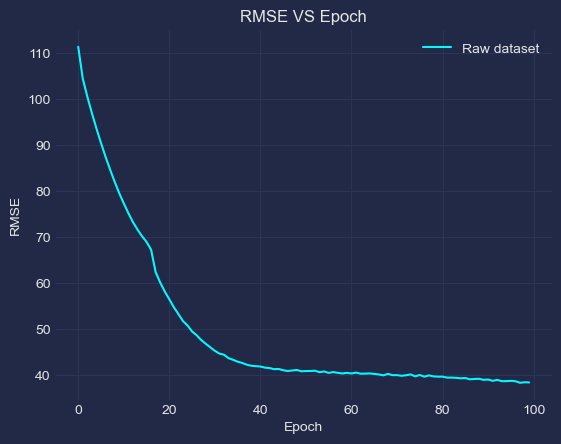

In [9]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')
plt.plot(history.history['root_mean_squared_error'])
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend([ 'Raw dataset'])
plt.title('RMSE VS Epoch')
df_history=pd.DataFrame()
df_history['root_mean_squared_error']=history.history['root_mean_squared_error']
df_history.to_pickle("./rmse_raw.pkl") 

In [10]:
from tensorflow.keras.models import load_model
model = load_model('model/')

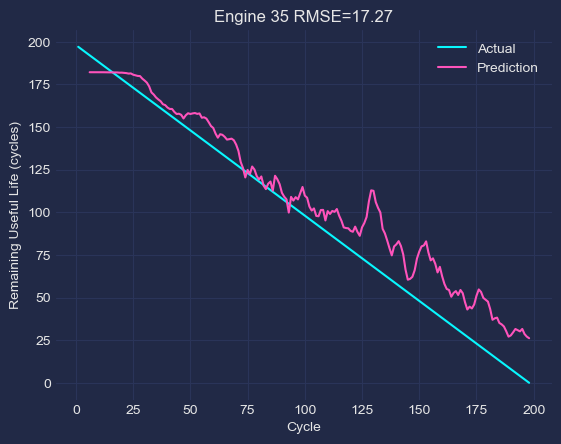

In [11]:
id = random.randint(1,100)
id=35
dataset_n=1
window=5
df=pd.read_csv("Test_{}.csv".format(dataset_n))
df=df[df['ID']==id]
df_pred=df.copy()
X_id,y_id=ts_idlist(df_pred,[id],window)
test_predictions = model.predict(X_id).flatten()
df_pred = df_pred.iloc[5:,:]
df_pred['RUL']=test_predictions.tolist()
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')
plt.ylabel('Remaining Useful Life (cycles)')
plt.xlabel('Cycle')
plt.title('Engine {} RMSE={:.2f}'.format(id,np.sqrt(metrics.mean_squared_error(df['RUL'][window:],df_pred['RUL']))))
#plt.plot(train_results['Actuals'])
plt.plot(df['Cycle'],df['RUL'])
plt.plot(df_pred['Cycle'],df_pred['RUL'])
plt.legend([ 'Actual','Prediction'])

In [12]:
df_pred.to_pickle("./pred_raw.pkl")

In [13]:
len(df_pred)

193